In [1]:
library(IRdisplay)
library(Cairo)

library(data.table)
library(arrow)
library(ggplot2)
library(cowplot)
library(ggrepel)
library(ggthemes)
library(ggpubr)
library(ggtext)
library(patchwork)
library(grid)
library(gridExtra)
library(scales)
library(stringr)
library(RColorBrewer)
library(yaml)
library(plyr)
library(tidyverse)
library(png)
library(rstatix)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp



Attaching package: ‘ggthemes’


The following object is masked from ‘package:cowplot’:

    theme_map



Attaching package: ‘ggpubr’


The following object is masked from ‘package:cowplot’:

    get_legend



Attaching package: ‘patchwork’


The following object is masked from ‘package:cowplot’:

    align_plots



Attaching package: ‘plyr’


The following object is masked from ‘package:ggpubr’:

    mutate


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::arrange()      masks plyr::arrange()
✖ dplyr::between()      masks data.table::between()
✖ readr::col_factor()   masks scales::col_factor()
✖ dplyr::combine()      masks gr

In [2]:
# set global plot parameters
FONTSIZE = 12
THEME = theme_cowplot(font_size = FONTSIZE, font_family = 'Helvetica') + theme(plot.tag = element_text(face = "bold"))

In [3]:
output_path = '/data/nasif12/home_if12/tsi/projects/kipoi_veff_analysis/plots'
enrichment_df = open_dataset('promoter_enrichment.parquet') %>% collect() %>% as.data.table()
veff_df = open_dataset('promoter_bin_abexp.parquet') %>% collect() %>% as.data.table()

In [4]:
head(enrichment_df)

outlier_state,tss_distance_bin_label,bin_size,count,total_count,enrichment,ci_low,ci_high
<fct>,<fct>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>
underexpressed,"[-2000, -1750)",250,260,5154,0.0002017850,0.0001778843,0.0002256857
overexpressed,"[1250, 1500)",250,219,3434,0.0002550961,0.0002224057,0.0002877865
overexpressed,"[-250, 0)",250,285,3434,0.0003319744,0.0002950667,0.0003688820
underexpressed,"[750, 1000)",250,289,5154,0.0002242918,0.0001991682,0.0002494154
normal,"[1500, 1750)",250,972201,14895320,0.0002610756,0.0002605738,0.0002615773
normal,"[1750, 2000)",250,1112937,14895320,0.0002988689,0.0002983348,0.0002994030


In [5]:
head(veff_df)

gene,tissue,individual,tss_distance,outlier_state,zscore,FDR,AbExp,expected_expr@theta,splice_ensemble@AbSplice,⋯,vep@NMD_transcript_variant.proportion,vep@NMD_escaping_variant.proportion,vep@start_lost.proportion,vep@splice_donor_variant.proportion,vep@splice_acceptor_variant.proportion,vep@splice_region_variant.proportion,tss_distance_bin,is_underexpressed,tss_distance_bin_label,bin_size
<chr>,<chr>,<chr>,<int>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<lgl>,<fct>,<int>
ENSG00000110090,Colon - Transverse,GTEX-WFG7,-41,normal,0.3168406,1,0.0006600820,35.67693,1.783016e-04,⋯,0.00000000,0,0,0,0,0,-50,FALSE,"[-250, 0)",250
ENSG00000154845,Testis,GTEX-ZLFU,-1048,normal,-0.5704104,1,0.0003340475,401.34814,NA,⋯,0.06859338,0,0,0,0,0,-1050,FALSE,"[-1250, -1000)",250
ENSG00000154845,Testis,GTEX-ZLFU,-1028,normal,-0.5704104,1,0.0003340475,401.34814,NA,⋯,0.06859338,0,0,0,0,0,-1050,FALSE,"[-1250, -1000)",250
ENSG00000154845,Testis,GTEX-ZLFU,-1157,normal,-0.5704104,1,0.0003340475,401.34814,NA,⋯,0.06859338,0,0,0,0,0,-1200,FALSE,"[-1250, -1000)",250
ENSG00000154845,Testis,GTEX-ZLFU,-449,normal,-0.5704104,1,0.0003340475,401.34814,NA,⋯,0.06859338,0,0,0,0,0,-450,FALSE,"[-500, -250)",250
ENSG00000167740,Cells - Cultured fibroblasts,GTEX-OXRK,-1175,normal,2.3024447,1,0.0022315883,142.94370,5.899276e-06,⋯,0.00000000,0,0,0,0,0,-1200,FALSE,"[-1250, -1000)",250


In [6]:
colnames(veff_df)

[1] "gene"                                      
 [2] "tissue"                                    
 [3] "individual"                                
 [4] "tss_distance"                              
 [5] "outlier_state"                             
 [6] "zscore"                                    
 [7] "FDR"                                       
 [8] "AbExp"                                     
 [9] "expected_expr@theta"                       
[10] "splice_ensemble@AbSplice"                  
[11] "splice_ensemble@MMSplice_SpliceMap_Psi_ref"
[12] "splice_ensemble@SpliceAI"                  
[13] "vep@cadd_raw.max"                          
[14] "vep@LoF_HC.proportion"                     
[15] "vep@transcript_ablation.proportion"        
[16] "vep@stop_gained.proportion"                
[17] "vep@frameshift_variant.proportion"         
[18] "vep@coding_sequence_variant.proportion"    
[19] "vep@missense_variant.proportion"           
[20] "vep@inframe_deletion.proportion"           
[21] "vep@inframe_insertion.proportion"          
[22] "vep@stop_lost.proportion"                  
[23] "vep@3_prime_UTR_variant.proportion"        
[24] "vep@5_prime_UTR_variant.proportion"        
[25] "vep@NMD_transcript_variant.proportion"     
[26] "vep@NMD_escaping_variant.proportion"       
[27] "vep@start_lost.proportion"                 
[28] "vep@splice_donor_variant.proportion"       
[29] "vep@splice_acceptor_variant.proportion"    
[30] "vep@splice_region_variant.proportion"      
[31] "tss_distance_bin"                          
[32] "is_underexpressed"                         
[33] "tss_distance_bin_label"                    
[34] "bin_size"

Warning message:
“A numeric `legend.position` argument in `theme()` was deprecated in ggplot2
3.5.0.
ℹ Please use the `legend.position.inside` argument of `theme()` instead.”


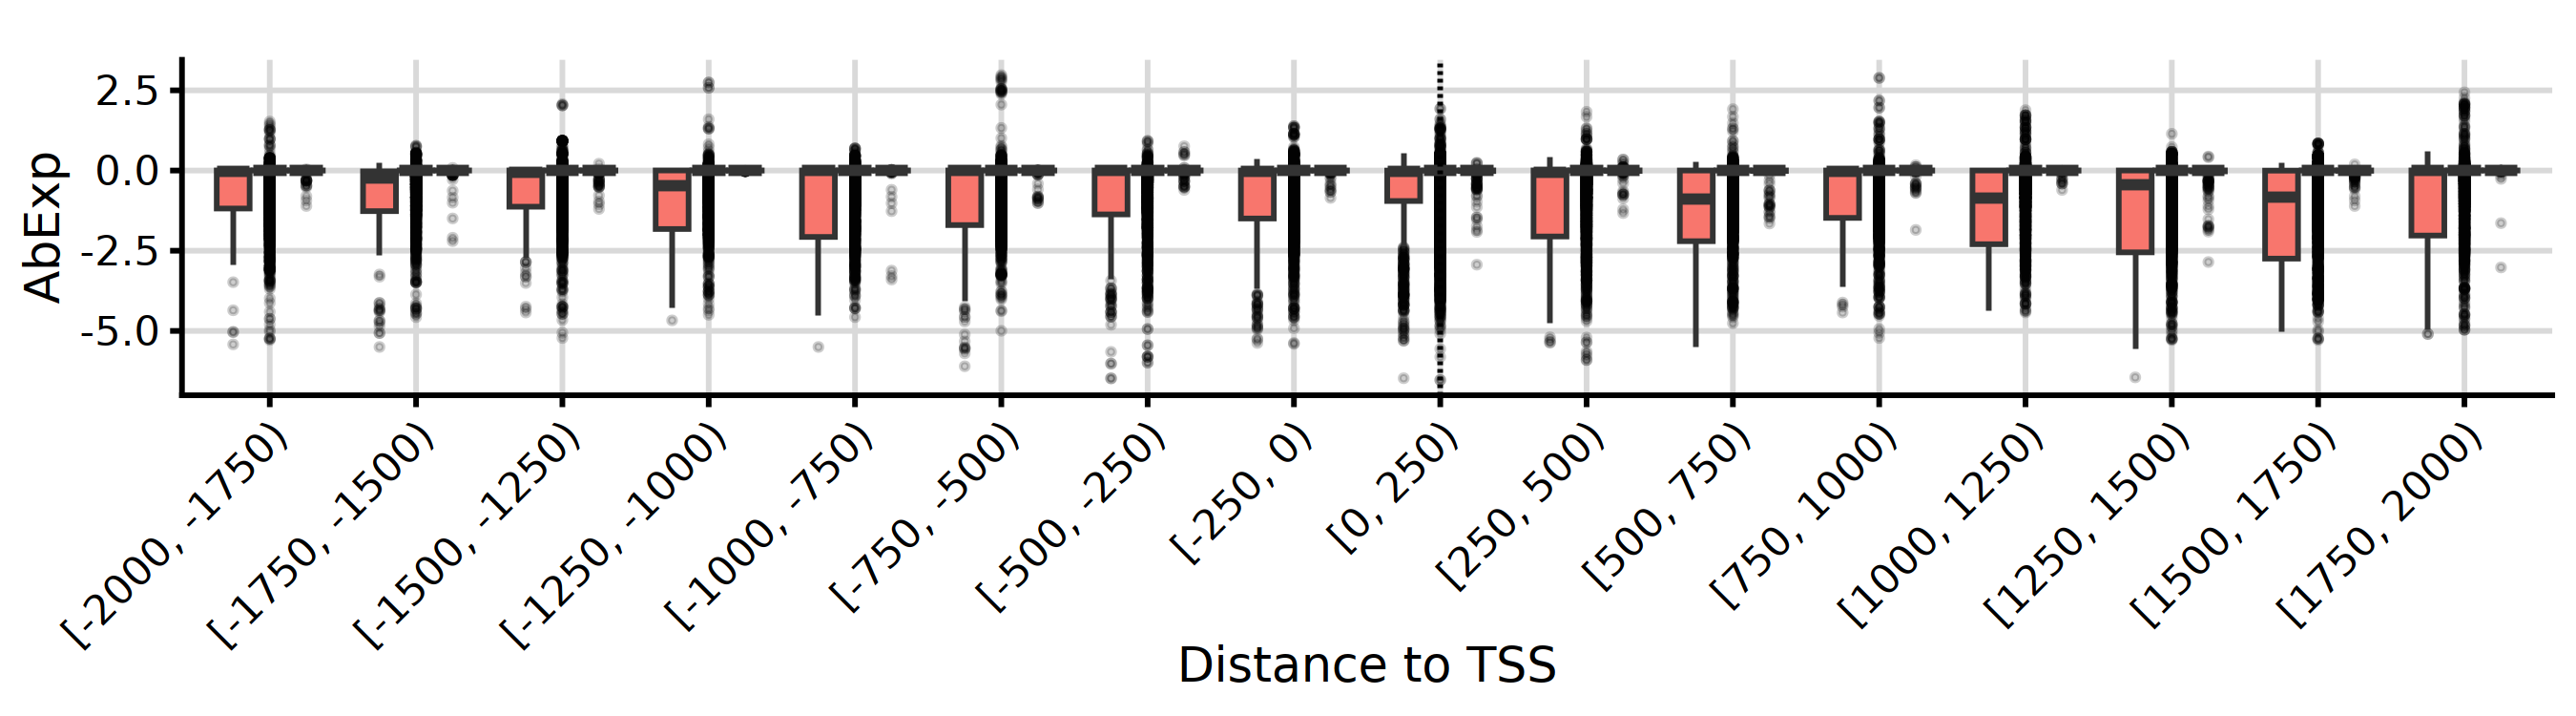

In [7]:
options(repr.plot.width=9, repr.plot.height=2.5, repr.plot.res=300)
p1 = (
    ggplot(veff_df %>% replace_na(list(`AbExp`=0)), aes(x=`tss_distance_bin_label`, fill=`outlier_state`))
    + geom_boxplot(aes(y=`AbExp`), outlier.size=0.5, outlier.color='#00000032', show.legend = FALSE)
    + THEME
    + theme(
        axis.text.x=element_text(angle = 45, hjust = 1),
        legend.position = c(0.7, 0.9),
        legend.margin=margin(-15,15,2,2),
        legend.background=element_rect(fill='white', color='black', linewidth=0.3)
    )
    + labs(
        x="Distance to TSS", 
        # y="AbExp z-score",
        color="",
        fill="",
        title=element_blank(),
    )
    # + coord_cartesian(ylim=c(-7.5, 2))
    + guides(size='none', fill = guide_legend(reverse = TRUE))
    + background_grid()
    + geom_vline(xintercept=9, linetype="dashed", color = "black")
    )
p1

In [10]:
log10_math_format <- function(x) {
  exponent <- floor(log10(x))
  base <- round(x / 10^exponent, 0)
  if (exponent < 4) {
      return(x)
  } else if (base == 1) {
    return(bquote(10^.(exponent)))  # 10^x format when base is 1
  }  else {
    return(bquote(.(base) %*% 10^.(exponent)))  # Base * 10^x format
  }
}

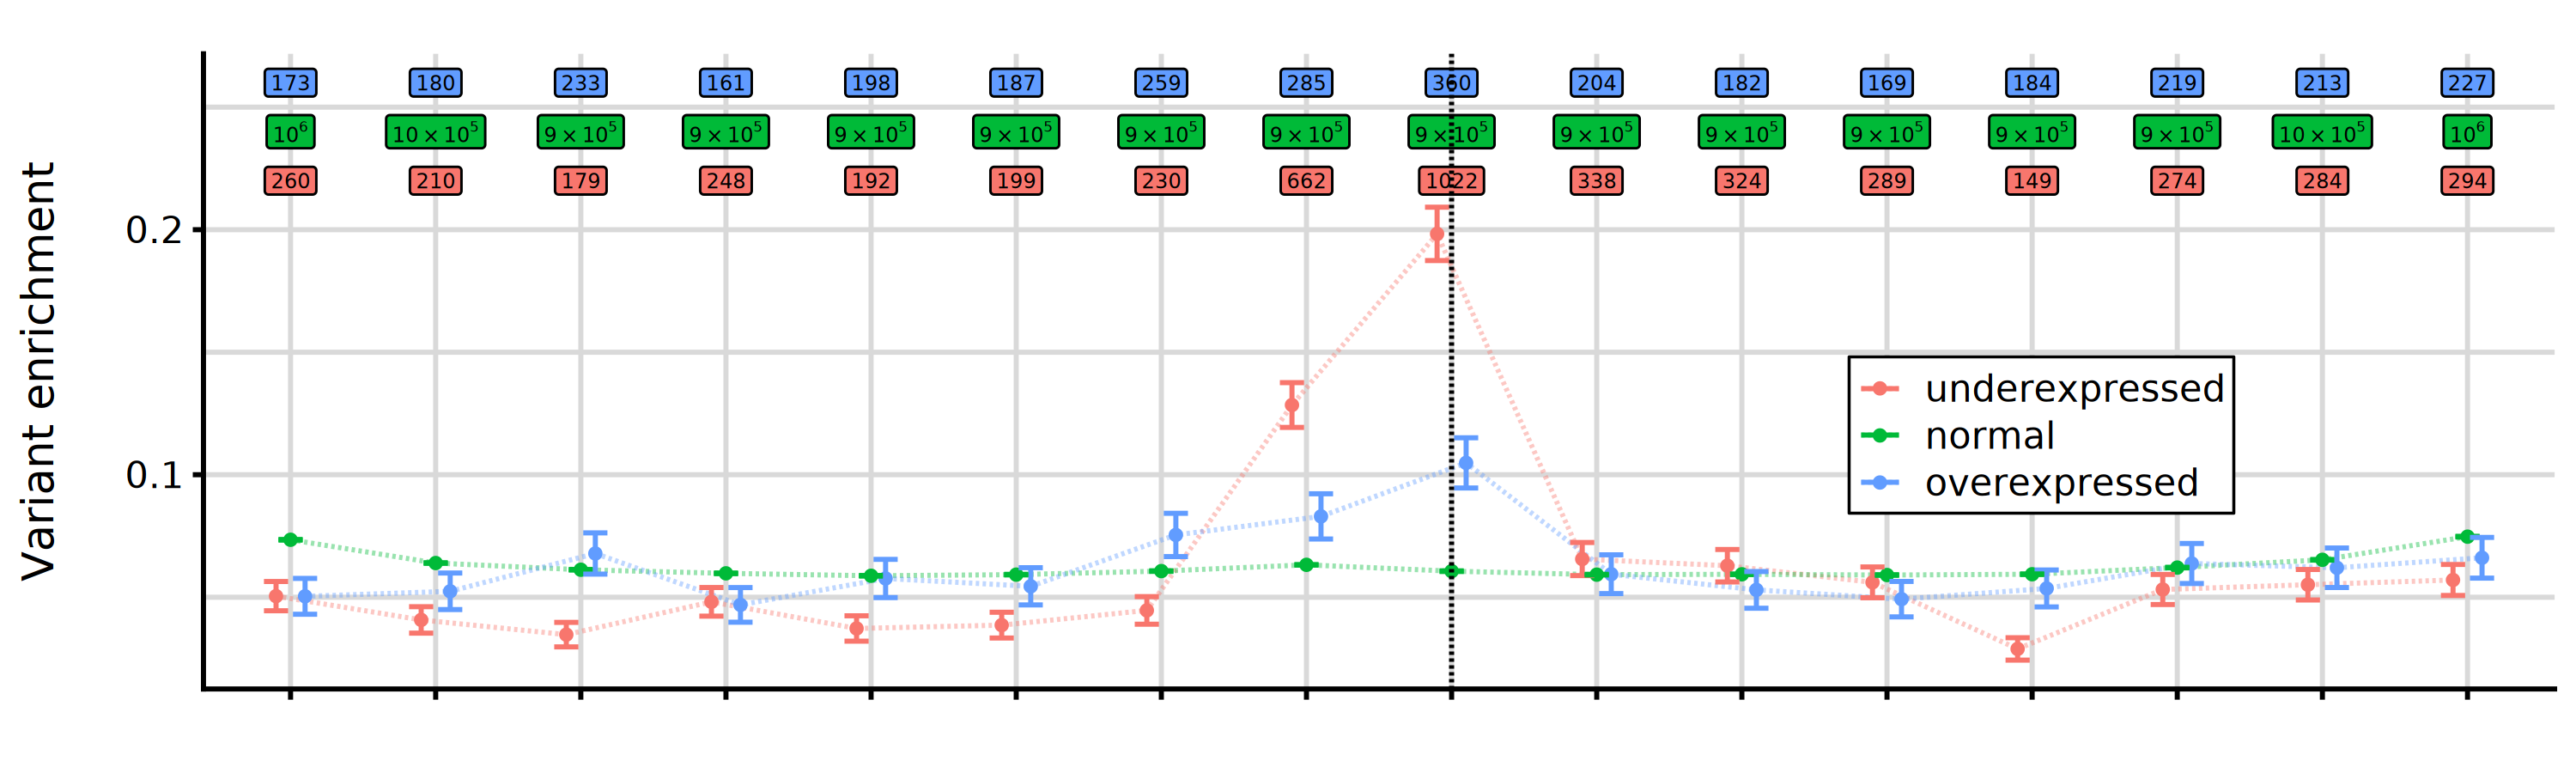

In [11]:
options(repr.plot.width=10, repr.plot.height=3, repr.plot.res=300)
dodge_width = 0.3
label_start_pos = 0.22
label_distance = 0.02
# Define the y-positions for each outlier state
outlier_state_y_positions <- c(
  "normal" = label_start_pos + label_distance,
  "underexpressed" = label_start_pos,
  "overexpressed" = label_start_pos + 2*label_distance
)

# Add the new y-position column based on outlier_state
enrichment_df <- enrichment_df %>%
  mutate(count_pos = outlier_state_y_positions[as.character(outlier_state)])

p2 = (
    ggplot(enrichment_df, aes(x=`tss_distance_bin_label`, y=`enrichment` * `bin_size`, fill=`outlier_state`, color=`outlier_state`))
    + geom_line(aes(group=`outlier_state`), linetype="dashed", position = position_dodge(width = dodge_width),  alpha=0.4)
    + geom_point(position = position_dodge(width = dodge_width), size=1)
    + geom_errorbar(aes(ymin=`ci_low`*`bin_size`, ymax=`ci_high`*`bin_size`), width=0.5, position = position_dodge(width = dodge_width))
    + THEME
    + theme(
        # axis.text.x=element_text(angle = 45, hjust = 1),
        axis.title.y = element_text(margin = margin(r = 20)),  # Increase margin on the right side of the y-axis label
        axis.text.x=element_blank(),
        legend.position = c(0.7, 0.4),
        legend.margin=margin(-15,15,2,2),
        legend.background=element_rect(fill='white', color='black', linewidth=0.3)
    )
    + labs(
        x="", 
        y="Variant enrichment",
        color="",
        fill="",
        title=element_blank(),
    )
    + background_grid(major = "xy", minor = "y", size.minor = 0.5)
    + geom_label(aes(label=sapply(`count`, log10_math_format), y=`count_pos`), size=2, color="black", parse=TRUE, show.legend=FALSE)  # Add count labels, adjust y to place below
    + geom_vline(xintercept=9, linetype="dashed", color = "black")
)
p2

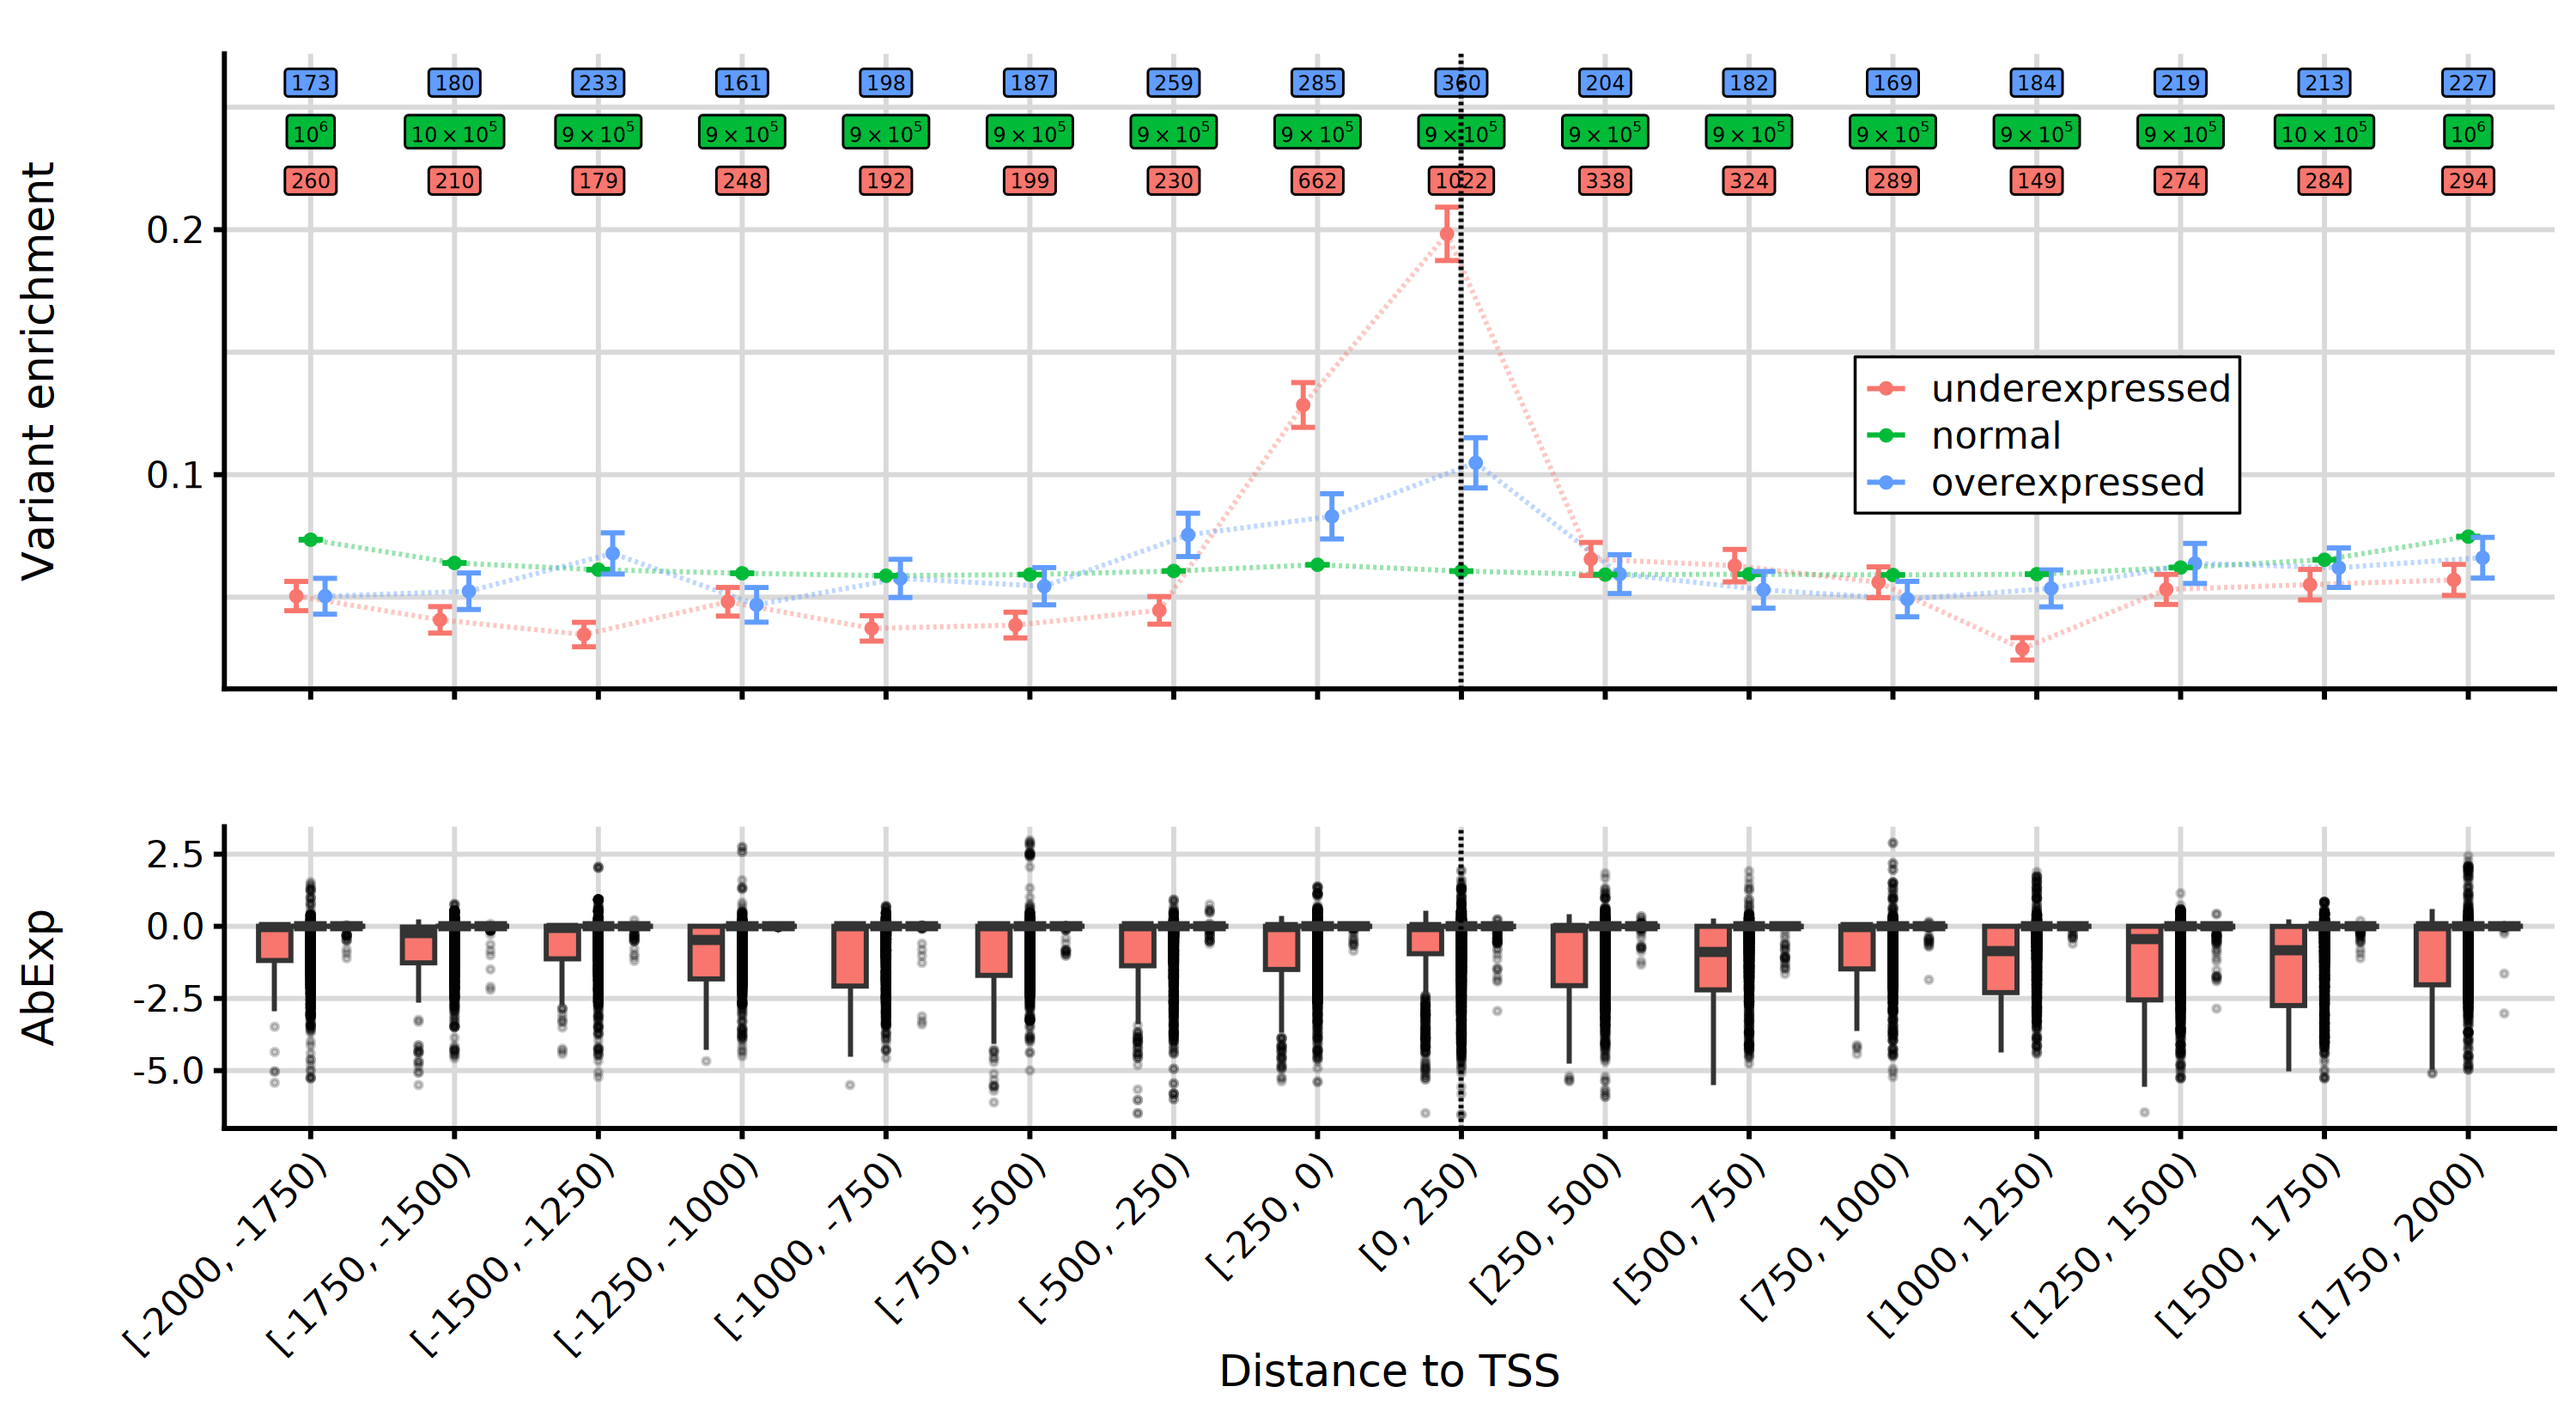

In [12]:
options(repr.plot.width=10, repr.plot.height=5.5, repr.plot.res=300)
p3 <- plot_grid(p2, p1, align='v',ncol=1, rel_heights = c(3, 2.5))
p3

In [13]:
width=10
height=5.5

path = paste(output_path, 'promoter_enrichment', sep='/')
print(paste0("Saving to ", path, "..."))
ggsave(paste0(path, ".png"), p3, width = width, height = height, dpi=600, type='cairo')

[1] "Saving to /data/nasif12/home_if12/tsi/projects/kipoi_veff_analysis/plots/promoter_enrichment..."


Warning message:
“Using ragg device as default. Ignoring `type` and `antialias` arguments”
